In [84]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [92]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
count = df_ce.groupby('job_posted_month').size().sort_index(ascending=False)    #count the rows/occurances of each group
# df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.month 
# job_counts = df_ce['job_posted_month'].value_counts().sort_index().reset_index(name='job_count')
# job_counts['month_abbr'] = pd.to_datetime(job_counts['job_posted_month'], format='%m').dt.strftime('%b')
# df_ce
# count

# plt.plot(
#     job_counts['month_abbr'],
#     job_counts['job_count'],
#     linestyle = ':',
#     color = 'purple',
#     marker = 'o'
# )

count.plot(
    kind = 'line',
    linestyle = ':',   
    color = 'purple',
    marker = 'o'
)
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')

plt.show()

In [101]:
SDA_df = df[df['job_title_short']=='Senior Data Analyst'].copy()
# count = SDA_df.groupby('company_name').size().sort_values(ascending=False).head()
count = SDA_df['company_name'].value_counts().sort_values(ascending=False).head()

# SDA_df
count

company_name
UnitedHealth Group    390
Citi                  356
Emprego               235
Wells Fargo           219
Walmart               141
Name: count, dtype: int64

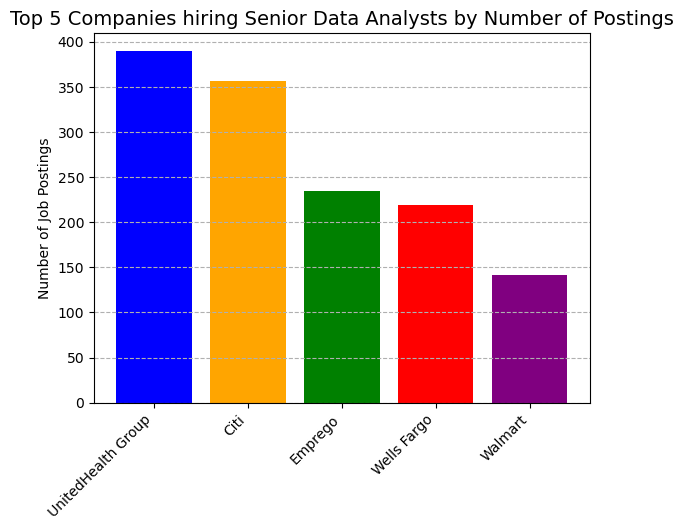

In [103]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

# count.plot(
#     kind='bar',
#     color=colors
# )

plt.bar(count.index,count.values,color=colors)
plt.grid(axis='y',linestyle='--')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings',fontsize=14)

plt.show()